In [162]:
import pandas as pd
import matplotlib.pyplot as plt

In [164]:
#LOADING DATASET
df=pd.read_csv("train.csv",parse_dates=["Date"])
df.set_index("Date" , inplace=True)
df.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924,False
2010-02-12,1,1,46039,True
2010-02-19,1,1,41596,False
2010-02-26,1,1,19404,False
2010-03-05,1,1,21828,False


In [166]:
#DATA EXPLORATION
print(df)

            Store  Dept  Weekly_Sales  IsHoliday
Date                                            
2010-02-05      1     1         24924      False
2010-02-12      1     1         46039       True
2010-02-19      1     1         41596      False
2010-02-26      1     1         19404      False
2010-03-05      1     1         21828      False
...           ...   ...           ...        ...
2012-09-28     45    98           508      False
2012-10-05     45    98           628      False
2012-10-12     45    98          1061      False
2012-10-19     45    98           760      False
2012-10-26     45    98          1077      False

[421570 rows x 4 columns]


In [168]:
df.tail()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2012-09-28,45,98,508,False
2012-10-05,45,98,628,False
2012-10-12,45,98,1061,False
2012-10-19,45,98,760,False
2012-10-26,45,98,1077,False


In [170]:
df.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [172]:
df.dtypes

Store             int64
Dept              int64
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Weekly_Sales  421570 non-null  float64
 3   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2)
memory usage: 13.3 MB


In [176]:
# ANALYZING DATA SET WITH MONTHLY SALES
monthly_sales = df.resample("ME")["Weekly_Sales"].sum()
# changing its format from scientic notation 
pd.options.display.float_format = '{:.0f}'.format
print(monthly_sales)


Date
2010-02-28   190332983
2010-03-31   181919802
2010-04-30   231412368
2010-05-31   186710934
2010-06-30   192246172
2010-07-31   232580126
2010-08-31   187640111
2010-09-30   177267896
2010-10-31   217161824
2010-11-30   202853370
2010-12-31   288760533
2011-01-31   163703967
2011-02-28   186331328
2011-03-31   179356448
2011-04-30   226526511
2011-05-31   181648158
2011-06-30   189773385
2011-07-31   229911399
2011-08-31   188599332
2011-09-30   220847738
2011-10-31   183261283
2011-11-30   210162355
2011-12-31   288078102
2012-01-31   168894472
2012-02-29   192063580
2012-03-31   231509650
2012-04-30   188920906
2012-05-31   188766479
2012-06-30   240610329
2012-07-31   187509452
2012-08-31   236850766
2012-09-30   180645544
2012-10-31   184361680
Freq: ME, Name: Weekly_Sales, dtype: float64


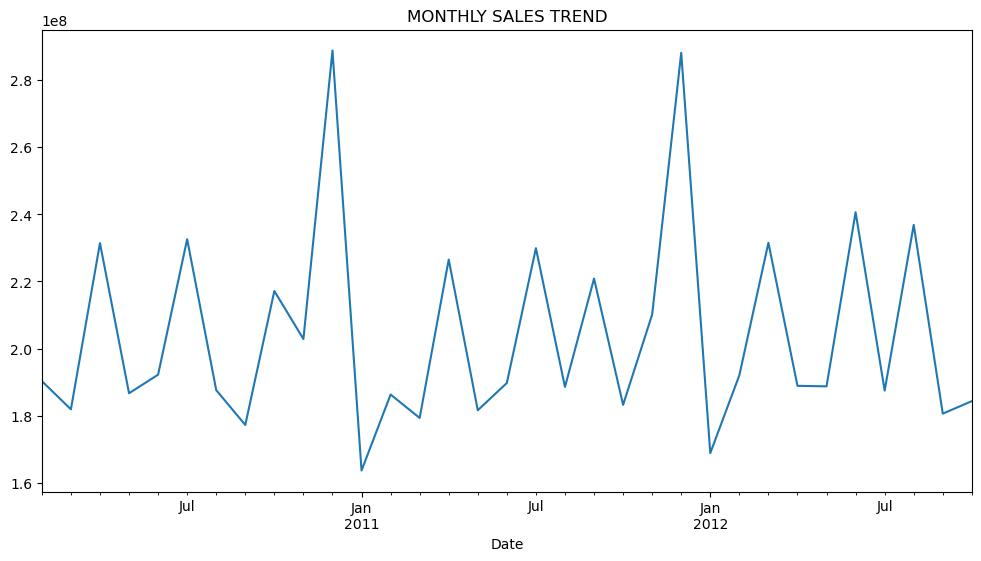

In [178]:
#VISUALIZATION
#Trend  visualization
plt.figure(figsize=(12,6))
monthly_sales.plot(title="MONTHLY SALES TREND")
plt.show()

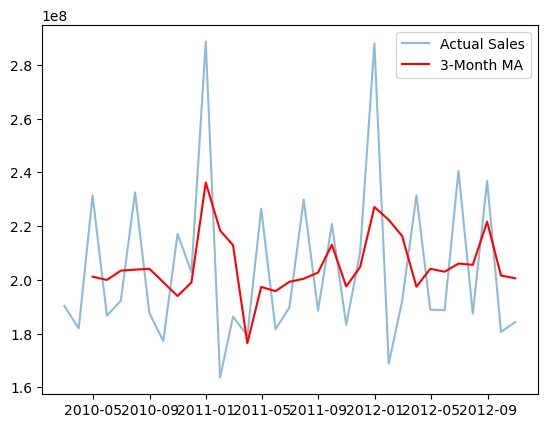

In [180]:
#Moving Averges
monthly_sales_ma = monthly_sales.rolling(window=3).mean()
plt.plot(monthly_sales.index, monthly_sales, label="Actual Sales", alpha=0.5)
plt.plot(monthly_sales_ma.index, monthly_sales_ma, label="3-Month MA", color="red")
plt.legend()
plt.show()


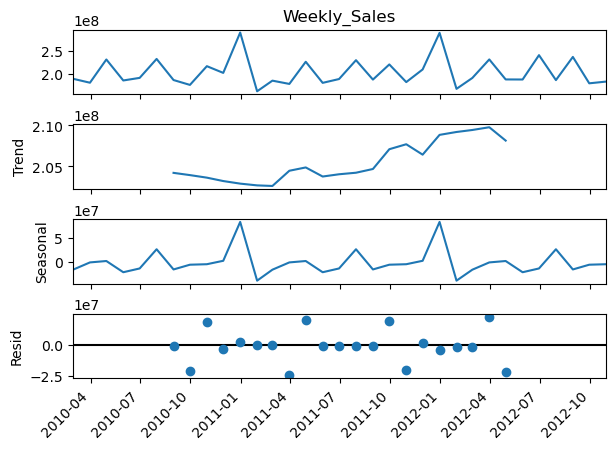

In [182]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(monthly_sales, model="additive", period=12)
fig=result.plot()
fig.autofmt_xdate(rotation=45)
plt.show()


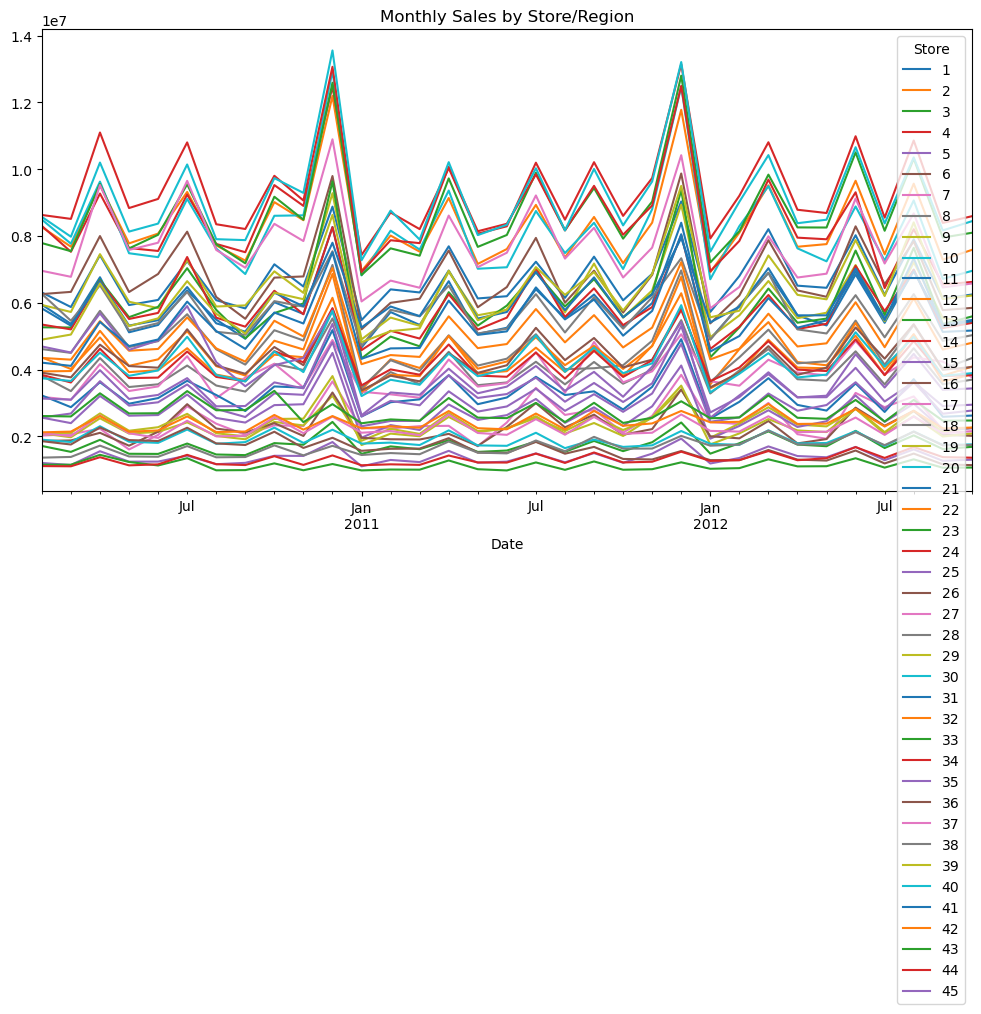

In [184]:
#BREAKDOWN REVENUE BY PRODUCT AND REGION OVER TIME
region_sales = df.groupby(["Store"])["Weekly_Sales"].resample("ME").sum().unstack("Store")
region_sales.plot(figsize=(12,6), title="Monthly Sales by Store/Region")
plt.show()

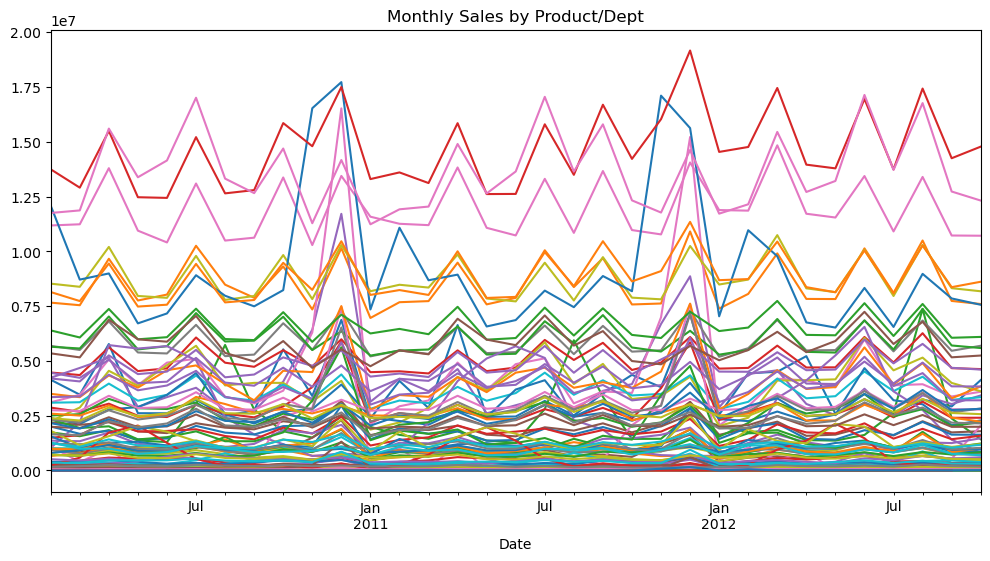

In [160]:
product_sales = df.groupby(["Dept"])["Weekly_Sales"].resample("ME").sum().unstack("Dept")
product_sales.plot(figsize=(12,6), legend=False, title="Monthly Sales by Product/Dept")
plt.show()


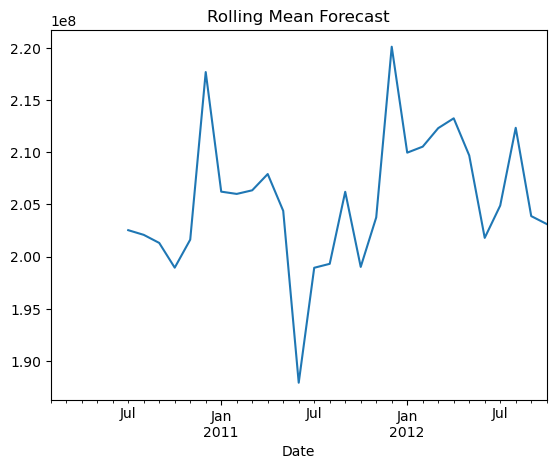

In [133]:
#SIMPLE FORECASTING
#Rolling Mean
forecast = monthly_sales.rolling(window=6).mean()
forecast.plot(title="Rolling Mean Forecast")
plt.show()


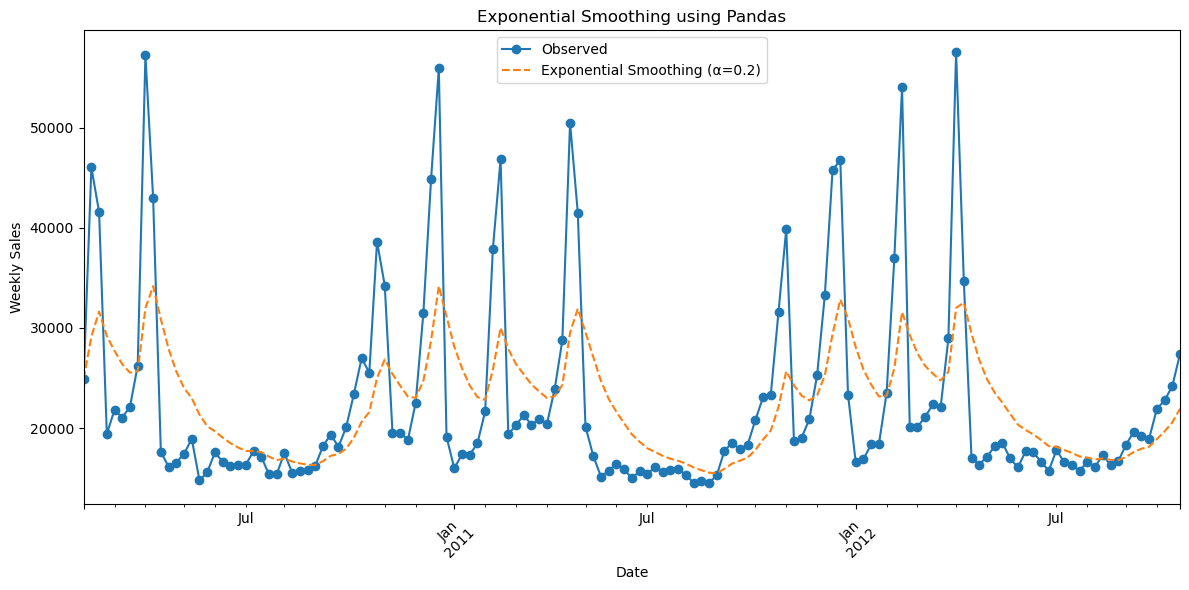

In [155]:
#Exponential Soothing
weekly_sales = store_dept_data['Weekly_Sales'].sort_index()
smoothed_series = weekly_sales.ewm(alpha=0.2, adjust=False).mean()
plt.figure(figsize=(12, 6))
weekly_sales.plot(label="Observed", marker='o')
smoothed_series.plot(label="Exponential Smoothing (α=0.2)", linestyle='--')
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.title("Exponential Smoothing using Pandas")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
